In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

results_dir = os.path.join('..', 'data', 'results')
match_dir = os.path.join('..', 'data', 'matching')


df_k_raw = pd.read_csv(os.path.join(results_dir, 'kinect_gait_metrics.csv'),
                       index_col=0)

df_z_raw = pd.read_csv(os.path.join(results_dir, 'zeno_gait_metrics.csv'),
                       index_col=0)

df_match = pd.read_csv(os.path.join(match_dir, 'match_kinect_zeno.csv'))

# Drop rows where file has no match
df_match = df_match.dropna(axis=0)


df_match_zeno = pd.merge(df_match, df_z_raw, left_on='Zeno', right_index=True)

df_total = pd.merge(df_match_zeno, df_k_raw, left_on='Kinect',
                    right_index=True, suffixes=('_z', '_k'))


# Take columns from total DataFrame to get Kinect and Zeno data
df_k = df_total.filter(like='_k')
df_z = df_total.filter(like='_z')

# Remove suffixes from column names
df_k = df_k.rename(columns=lambda x: str(x)[:-2])
df_z = df_z.rename(columns=lambda x: str(x)[:-2])

# Add file names to individual DataFrames
df_k['File'] = df_match.Kinect
df_z['File'] = df_match.Zeno

## Visual Results

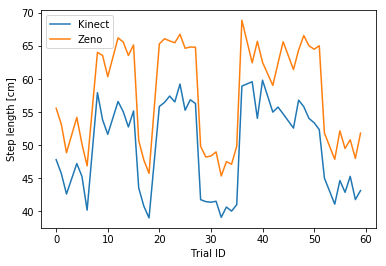

In [2]:
plt.plot(df_k['Step length'])
plt.plot(df_z['Step length'])

plt.xlabel('Trial ID')
plt.ylabel('Step length [cm]')

plt.legend(['Kinect', 'Zeno'])
plt.show()

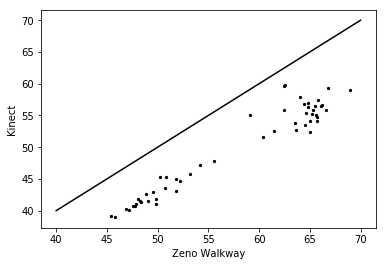

In [3]:
plt.plot([70, 40], [70, 40], c='black')
plt.scatter(df_z['Step length'], df_k['Step length'], c='black', s=5)

plt.xlabel('Zeno Walkway')
plt.ylabel('Kinect')

plt.show()

Text(0,0.5,'Kinect')

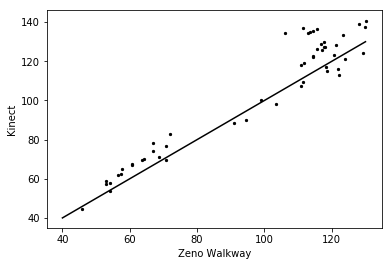

In [4]:
plt.plot([130, 40], [130, 40], c='black')
plt.scatter(df_z['Stride vel'], df_k['Stride vel'], c='black', s=5)

plt.xlabel('Zeno Walkway')
plt.ylabel('Kinect')

In [5]:
from scipy.stats import spearmanr, pearsonr


In [6]:

def foo(df_1, df_2, func):

    df_numeric = df_1.select_dtypes(include='number')

    results_dict = {k: {} for k in df_numeric}

    for col in df_numeric:
        
        results_dict[col] = func(df_1[col], df_2[col])

    return results_dict

In [7]:
import sys
sys.path.append('..')

import modules.stats as st

In [8]:
d = {}
d['Pearson'] = foo(df_z, df_k, lambda a, b: pearsonr(a, b)[0])
d['Spearman'] = foo(df_z, df_k, lambda a, b: spearmanr(a, b)[0])

d['Rel error'] = foo(df_z, df_k, lambda a, b: st.relative_error(a, b, absolute=True).mean())

df_results = pd.DataFrame(d).T

In [9]:
df_results

,Step length,Stride length,Stride vel,Stride width
Pearson,0.966464,0.967958,0.961660,0.910475
Spearman,0.885597,0.886963,0.832665,0.788867
Rel error,0.161251,0.163481,0.076786,0.413596


In [11]:
bias = st.percent_difference(df_k['Stride vel'] , df_z['Stride vel']).mean()

In [12]:
bias

0.06262030108203138